In [ ]:
import pandas as pd

In [ ]:
demo = pd.read_csv('/content/drive/MyDrive/uidai/combined_dataset2/demo_combined.csv')
bio = pd.read_csv('/content/drive/MyDrive/uidai/combined_dataset2/bio_combined.csv')
enroll = pd.read_csv('/content/drive/MyDrive/uidai/combined_dataset2/enroll_combined.csv')

In [ ]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071687 entries, 0 to 2071686
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [ ]:
demo['date'] = pd.to_datetime(demo['date'], format='%d-%m-%Y')
bio['date'] = pd.to_datetime(bio['date'], format='%d-%m-%Y')
enroll['date'] = pd.to_datetime(enroll['date'], format='%d-%m-%Y')
demo['date']

,date
0,2025-03-01
1,2025-03-01
2,2025-03-01
3,2025-03-01
4,2025-03-01
...,...
2071682,2025-10-31
2071683,2025-10-31
2071684,2025-10-31
2071685,2025-10-31


In [ ]:
bio.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


# Merging CSVs

A row's unique property is **date, district and pincode** combined <br>
(Date and pincode is not sufficiently unique as one pincode may fall under multiple districts)

In [ ]:
key_cols = ["date", "state", "district", "pincode"]

In [ ]:
demo_g = (
    demo
    .groupby(key_cols, as_index=False)[
        ["demo_age_5_17", "demo_age_17_"]
    ]
    .sum()
)

bio_g = (
    bio
    .groupby(key_cols, as_index=False)[
        ["bio_age_5_17", "bio_age_17_"]
    ]
    .sum()
)

enroll_g = (
    enroll
    .groupby(key_cols, as_index=False)[
        ["age_0_5", "age_5_17", "age_18_greater"]
    ]
    .sum()
)

In [ ]:
merged = (
    demo_g
    .merge(bio_g, on=key_cols, how="outer")
    .merge(enroll_g, on=key_cols, how="outer")
)

Joining will introduce NaNs where one action occured and another action did not occur, we need to replace those NaN with 0

In [ ]:
count_cols = [
    "demo_age_5_17", "demo_age_17_",
    "bio_age_5_17", "bio_age_17_",
    "age_0_5", "age_5_17", "age_18_greater"
]

merged[count_cols] = (
    merged[count_cols]
    .fillna(0)
    .astype(int)
)

Check the following (throw error if fails):


1. Date has no null values
2. District has no null values
3. Pincode has no null values
4. (date, district, pincode) combined does not repeat



In [ ]:
assert merged["date"].notna().all()
assert merged["district"].notna().all()
assert merged["pincode"].notna().all()

# key uniqueness
assert not merged.duplicated(
    subset=["date","state", "district", "pincode"]
).any()

In [ ]:
merged.sample(10)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,age_0_5,age_5_17,age_18_greater
2079417,2025-12-20,tamil nadu,Thanjavur,613202,0,0,1,0,0,0,0
683070,2025-10-13,west bengal,South 24 Parganas,743329,0,0,0,0,39,11,0
1061511,2025-11-01,bihar,Darbhanga,847337,0,0,4,3,0,0,0
1479973,2025-11-18,bihar,Begusarai,851128,0,0,0,0,2,1,0
928954,2025-10-26,tamil nadu,Villupuram,605802,4,10,12,6,1,0,0
754524,2025-10-17,uttar pradesh,Amethi,229309,8,28,12,4,6,3,0
1583413,2025-11-27,odisha,Bhadrak,756115,8,24,0,0,0,0,0
396801,2025-09-13,gujarat,Bharuch,392210,0,16,10,1,0,0,0
1282595,2025-11-10,bihar,Madhepura,852213,14,84,11,14,0,0,0
374780,2025-09-12,karnataka,Bengaluru,560043,2,62,8,19,7,0,5


In [ ]:
merged.nunique()

,0
date,115
state,36
district,1021
pincode,19814
demo_age_5_17,756
demo_age_17_,3196
bio_age_5_17,2122
bio_age_17_,2214
age_0_5,671
age_5_17,624


## Details

* There are 36 states (28 states + 8 union territories)
* There are 115 unique dates when updates happened
* There are 19,814 unique pincodes in the dataset
* There are 1021 unique districts in the dataset (This may have same districts with slight spelling difference)



In [ ]:
rows_all_updated = merged[(merged[count_cols] >= 1).all(axis=1)]
len(rows_all_updated)

9886

There are 9886 instances where all the categories had an update

In [ ]:
merged.to_csv('/content/drive/MyDrive/uidai/combined_dataset2/merged.csv')

# Realll Anaylyssysys

In [ ]:
merged.sample(5)

,date,state,district,pincode,demo_age_5_17,demo_age_17_,bio_age_5_17,bio_age_17_,age_0_5,age_5_17,age_18_greater
1572790,2025-11-27,andhra pradesh,West Godavari,534122,0,12,0,0,0,0,0
1393800,2025-11-14,odisha,Jharsuguda,768214,0,1,0,0,0,0,0
738020,2025-10-17,bihar,West Champaran,845306,3,84,11,12,14,7,1
31566,2025-04-01,kerala,Thiruvananthapuram,695010,0,0,18,44,0,0,0
2193903,2025-12-25,uttarakhand,Hardwar,247661,0,2,0,4,0,0,0


Visualisation tool

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
india_map = gpd.read_file("/content/drive/MyDrive/uidai/INDIA_STATES.geojson")
india_map["state"] = india_map["STNAME"].str.lower().str.strip()
india_map.sample(5)

,STNAME,STCODE11,STNAME_SH,Shape_Length,Shape_Area,OBJECTID_1,OBJECTID,State_LGD,Shape_Leng,MaxSimpTol,MinSimpTol,geometry,state
26,ODISHA,21,Odisha,3.709476e+06,1.783564e+11,27,27,21,3.709476e+06,300,300,"POLYGON ((86.80544 20.73296, 86.81166 20.75267...",odisha
5,GOA,30,Goa,4.333050e+05,3.921762e+09,6,6,30,4.333050e+05,300,300,"POLYGON ((73.85648 15.80076, 73.84674 15.78644...",goa
28,UTTAR PRADESH,09,Uttar Pradesh,6.507259e+06,3.046389e+11,29,29,9,6.507259e+06,300,300,"MULTIPOLYGON (((79.3742 25.14261, 79.3603 25.1...",uttar pradesh
27,TAMIL NADU,33,Tamil Nadu,3.413290e+06,1.360465e+11,28,28,33,3.413290e+06,300,300,"MULTIPOLYGON (((77.31735 8.1215, 77.31732 8.12...",tamil nadu
13,NAGALAND,13,Nagaland,1.075386e+06,2.062819e+10,14,14,13,1.075386e+06,300,300,"POLYGON ((95.19465 27.03132, 95.19297 27.03602...",nagaland


In [ ]:
def plotStateMap(data, col, title, colorScheme="jet"):
  india_map = gpd.read_file("/content/drive/MyDrive/uidai/INDIA_STATES.geojson")
  india_map["state"] = india_map["STNAME"].str.lower().str.strip()
  india_merged = india_map.merge(
    data,
    on="state",
    how="left"
  )
  fig, ax = plt.subplots(figsize=(8, 10))

  india_merged.plot(
      column=col,
      cmap=colorScheme,
      linewidth=0.6,
      edgecolor="black",
      legend=True,
      ax=ax
  )

  ax.set_title(title, fontsize=14)
  ax.axis("off")
  ax.ticklabel_format(style="plain", axis="y")

  plt.show()


In [ ]:
merged["total_demo_updates"] = merged["demo_age_5_17"] + merged["demo_age_17_"]
merged["total_bio_updates"] = merged["bio_age_5_17"] + merged["bio_age_17_"]
merged["total_enrolments"] = merged["age_0_5"] + merged["age_5_17"] + merged["age_18_greater"]

merged["total_activity"] = merged["total_demo_updates"] + merged["total_bio_updates"] + merged["total_enrolments"]
merged["total_activity_lakh"] = merged["total_activity"]/1e5

In [ ]:
all_states = merged["state"].unique()
len(all_states)

36

In [ ]:
state_totals = (
    merged.groupby("state", as_index=False)["total_activity"]
    .sum()
    .sort_values("total_activity", ascending=False)
)
state_totals

,state,total_activity
33,uttar pradesh,19138692
20,maharashtra,14649880
4,bihar,10321522
19,madhya pradesh,9330679
28,rajasthan,7161028
30,tamil nadu,7131135
35,west bengal,6772696
1,andhra pradesh,6137901
10,gujarat,5301390
6,chhattisgarh,4757391


In [ ]:
state_totals = (
    merged.groupby("state", as_index=False)["total_activity_lakh"]
    .sum()
    .sort_values("total_activity_lakh", ascending=False)
)
state_totals

,state,total_activity_lakh
33,uttar pradesh,191.38692
20,maharashtra,146.49880
4,bihar,103.21522
19,madhya pradesh,93.30679
28,rajasthan,71.61028
30,tamil nadu,71.31135
35,west bengal,67.72696
1,andhra pradesh,61.37901
10,gujarat,53.01390
6,chhattisgarh,47.57391


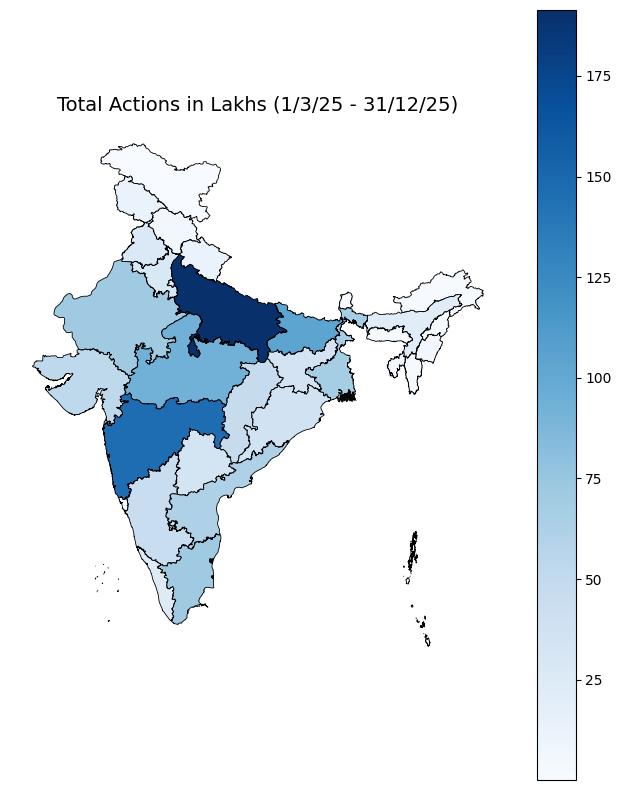

In [ ]:
plotStateMap(state_totals, 'total_activity_lakh', "Total Actions in Lakhs (1/3/25 - 31/12/25)", "Blues")

In [ ]:
merged['date'].min(), merged['date'].max()

(Timestamp('2025-03-01 00:00:00'), Timestamp('2025-12-31 00:00:00'))

Which action contributes the most to the action count of state <br>
No activity day = -1

In [ ]:
merged["activity_type"] = merged[["total_demo_updates", "total_bio_updates", "total_enrolments"]].idxmax(axis=1)
activity_map = {
    "total_enrolments": 0,
    "total_bio_updates": 1,
    "total_demo_updates": 2
}

merged["activity_type"] = merged["activity_type"].map(activity_map)
merged.loc[ (merged["total_enrolments"] == 0) & (merged["total_bio_updates"] == 0) & (merged["total_demo_updates"] == 0), "activity_type"] = -1

In [ ]:
(merged["activity_type"] == -1).sum()

np.int64(700)

There are 700 instances of a no activity day

In [ ]:
state_no_activity = (
    merged[merged["activity_type"] == -1]
    .groupby("state")
    .size()
    .reindex(all_states, fill_value=0)
    .sort_values(ascending=False)
)
len(state_no_activity)

36

Plot of states with no activity

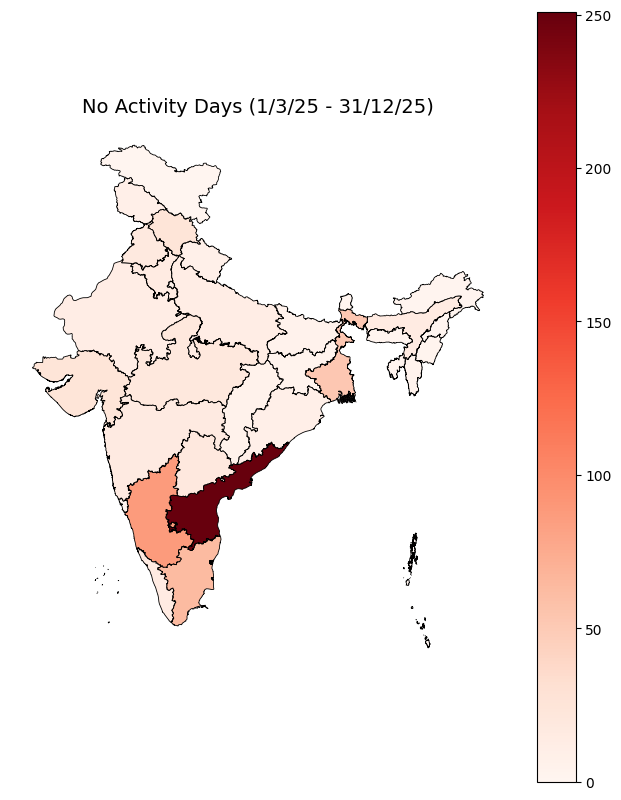

In [ ]:
state_no_activity_df = state_no_activity.reset_index().rename(columns={0: "no_activity_days"})
plotStateMap(state_no_activity_df, "no_activity_days", "No Activity Days (1/3/25 - 31/12/25)", colorScheme="Reds")

In [ ]:
presence = (
    merged.assign(active=(merged["activity_type"] != -1).astype(int))
      .pivot_table(
          index="state",
          columns="date",
          values="active",
          aggfunc="max",
          fill_value=0
      )
)
presence = presence.sort_index(axis=1)
presence

date,2025-03-01,2025-03-02,2025-03-09,2025-03-15,2025-03-20,2025-03-23,2025-03-26,2025-03-27,2025-03-28,2025-03-29,...,2025-12-21,2025-12-22,2025-12-23,2025-12-24,2025-12-25,2025-12-26,2025-12-27,2025-12-28,2025-12-29,2025-12-31
state,,,,,,,,,,,,,,,,,,,,,
andaman & nicobar,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
andhra pradesh,1,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
arunachal pradesh,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
assam,1,0,0,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
bihar,1,0,1,1,1,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
chandigarh,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
chhattisgarh,1,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
dadra and nagar haveli and daman and diu,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
delhi,1,0,1,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Plot of days with no activity as a chart, with states

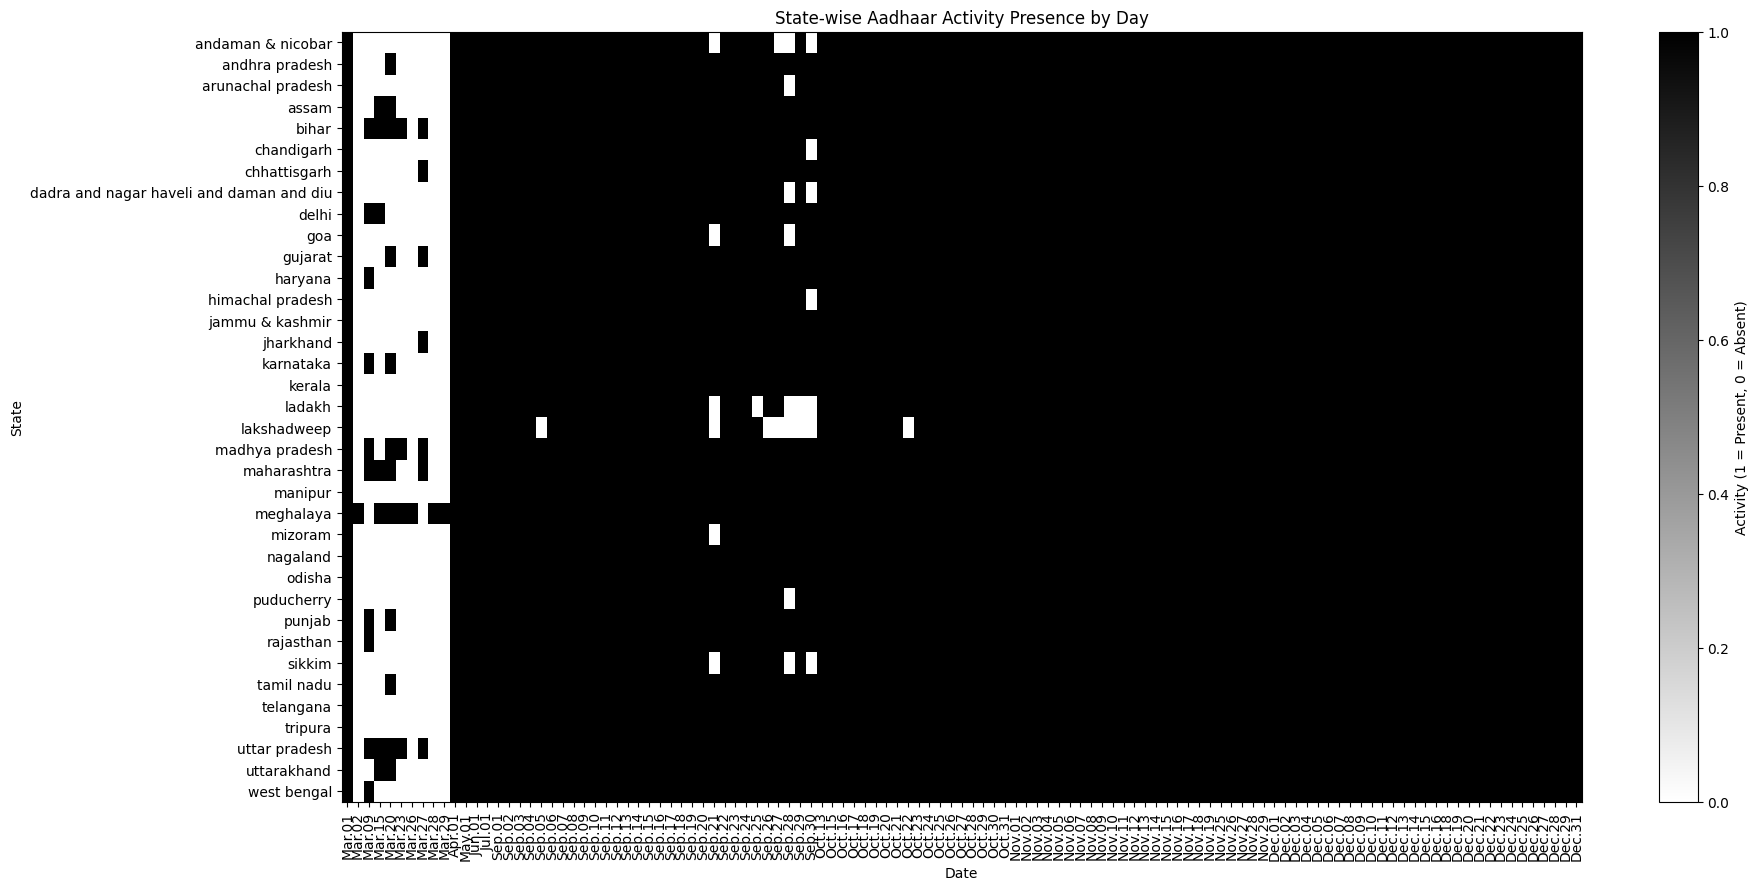

In [ ]:
import matplotlib.pyplot as plt
dates = dates = presence.columns
plt.figure(figsize=(20, 10))
plt.imshow(presence, aspect="auto", cmap="grey_r")
plt.colorbar(label="Activity (1 = Present, 0 = Absent)")
month_periods = dates.to_period("M")
month_start_mask = month_periods != month_periods.shift()
tick_positions = [i for i, v in enumerate(month_start_mask) if v]
tick_labels = dates[month_start_mask].strftime("%b.%d")
plt.xticks(tick_positions, tick_labels, rotation=90)

plt.yticks(
    range(len(presence.index)),
    presence.index
)

plt.xlabel("Date")
plt.ylabel("State")
plt.title("State-wise Aadhaar Activity Presence by Day")

plt.show()

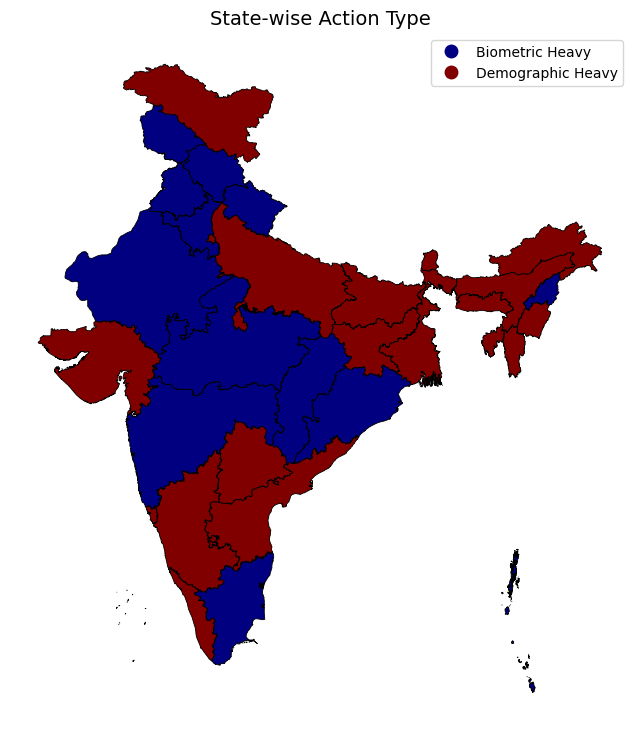

In [ ]:
state_type = (
    merged.groupby("state")["activity_type"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index(name="state_type")
)
state_type["state_type_label"] = state_type["state_type"].map({
    0: "Enrolment Heavy",
    1: "Biometric Heavy",
    2: "Demographic Heavy"
})
plotStateMap(state_type, "state_type_label", "State-wise Action Type", colorScheme="jet")

How state changes its dominant action type over the timeframe

In [ ]:
merged["month"] = merged["date"].dt.to_period("M")

state_month_type = (
    merged[merged["activity_type"] != -1]
    .groupby(["state", "month"])["activity_type"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index(name="dominant_type")
)
assert "activity_type" in merged.columns
transition_matrix = (
    state_month_type
    .pivot(index="state", columns="month", values="dominant_type")
    .sort_index(axis=1)
)

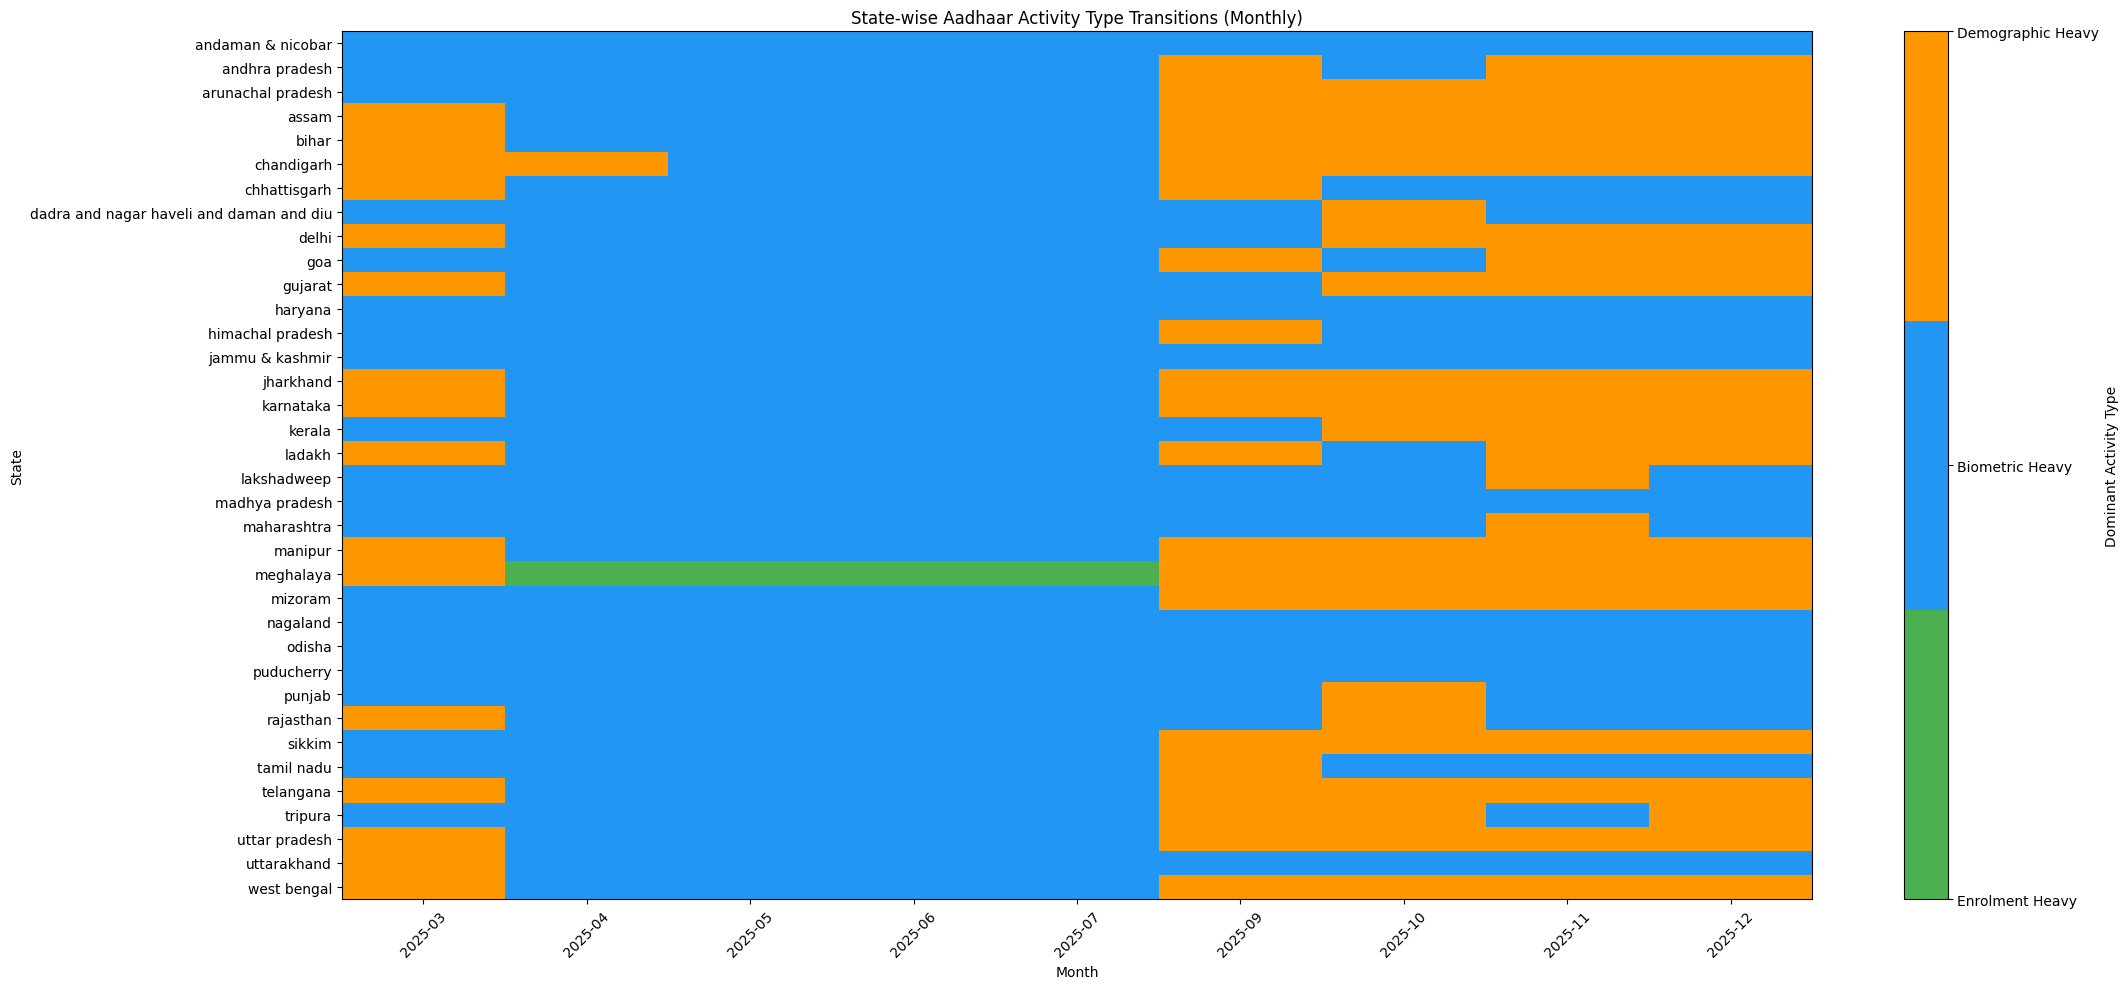

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap([
    "#4CAF50",  # 0 - Enrolment (green)
    "#2196F3",  # 1 - Biometric (blue)
    "#FF9800"   # 2 - Demographic (orange)
])

plt.figure(figsize=(22, 10))
plt.imshow(transition_matrix, aspect="auto", cmap=cmap)

plt.yticks(
    range(len(transition_matrix.index)),
    transition_matrix.index
)

plt.xticks(
    range(len(transition_matrix.columns)),
    transition_matrix.columns.astype(str),
    rotation=45
)

plt.xlabel("Month")
plt.ylabel("State")
plt.title("State-wise Aadhaar Activity Type Transitions (Monthly)")

cbar = plt.colorbar(
    ticks=[0, 1, 2],
    label="Activity Type"
)
cbar.ax.set_yticklabels([
    "Enrolment Heavy",
    "Biometric Heavy",
    "Demographic Heavy"
])
cbar.set_label("Dominant Activity Type")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def plot_bar(
    data,
    x_col=None,
    y_col=None,
    title="",
    xlabel="",
    ylabel="",
    horizontal=False,
    top_n=None,
    color=None
):
    if x_col is None and y_col is None:
        data = data.sort_values(ascending=False)
        if top_n is not None:
            data = data.head(top_n)
        x = data.index
        y = data.values
    else:
        data = data.copy()
        if top_n is not None:
            data = data.sort_values(y_col, ascending=False).head(top_n)
        x = data[x_col]
        y = data[y_col]

    plt.figure(figsize=(10, 6))

    if horizontal:
        plt.barh(x, y, color=color)
        plt.gca().invert_yaxis()
    else:
        plt.bar(x, y, color=color)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

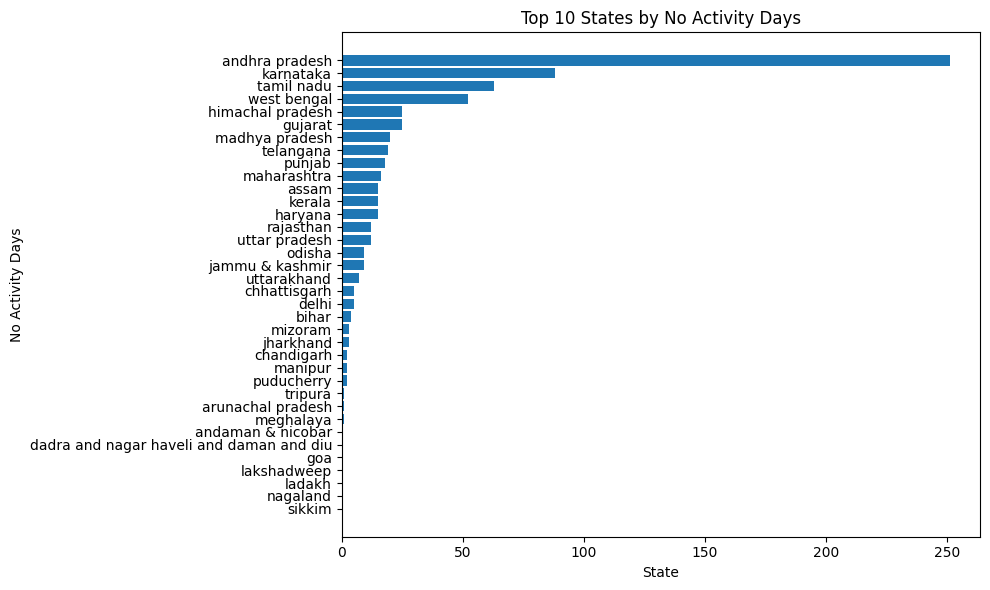

In [ ]:
plot_bar(
    state_no_activity,
    title="Top 10 States by No Activity Days",
    xlabel="State",
    ylabel="No Activity Days",
    horizontal=True,
    top_n=36
)

In [ ]:
merged.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'bio_age_5_17', 'bio_age_17_', 'age_0_5', 'age_5_17', 'age_18_greater',
       'total_demo_updates', 'total_bio_updates', 'total_enrolments',
       'total_activity', 'total_activity_lakh', 'activity_type', 'month'],
      dtype='object')

In [ ]:
merged["day_of_week"] = merged["date"].dt.dayofweek
merged["day_of_week"]

,day_of_week
0,5
1,5
2,5
3,5
4,5
...,...
2310870,2
2310871,2
2310872,2
2310873,2


In [ ]:
merged["adult_enrolment_skew"] = (
    merged["age_18_greater"] /
    (merged["age_0_5"] + merged["age_5_17"] + 1)
)

In [ ]:
state_activity = (
    merged
    .groupby("state")[[
        "total_enrolments",
        "total_demo_updates",
        "total_bio_updates"
    ]]
    .sum().sort_values(
        by=["total_enrolments", "total_demo_updates", "total_bio_updates"],
        ascending=False
    )
)

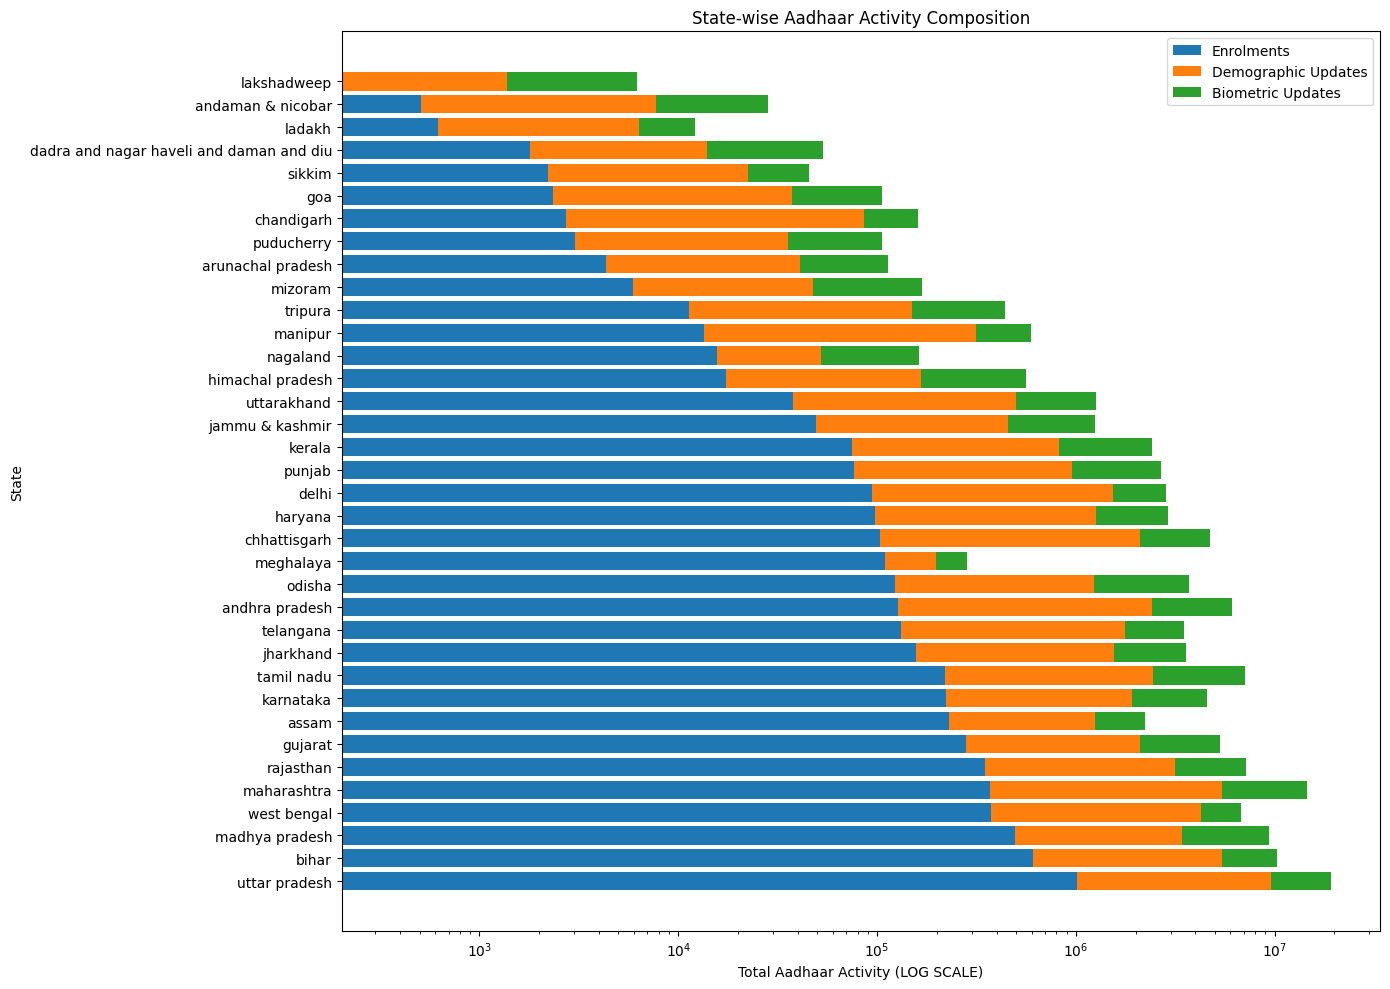

In [ ]:
plt.figure(figsize=(14, 10))

plt.barh(
    state_activity.index,
    state_activity["total_enrolments"],
    label="Enrolments"
)

plt.barh(
    state_activity.index,
    state_activity["total_demo_updates"],
    left=state_activity["total_enrolments"],
    label="Demographic Updates"
)

plt.barh(
    state_activity.index,
    state_activity["total_bio_updates"],
    left=state_activity["total_enrolments"] + state_activity["total_demo_updates"],
    label="Biometric Updates"
)
plt.xscale("log")
plt.xlabel("Total Aadhaar Activity (LOG SCALE)")
plt.ylabel("State")
plt.title("State-wise Aadhaar Activity Composition")

plt.legend()
plt.tight_layout()
plt.show()


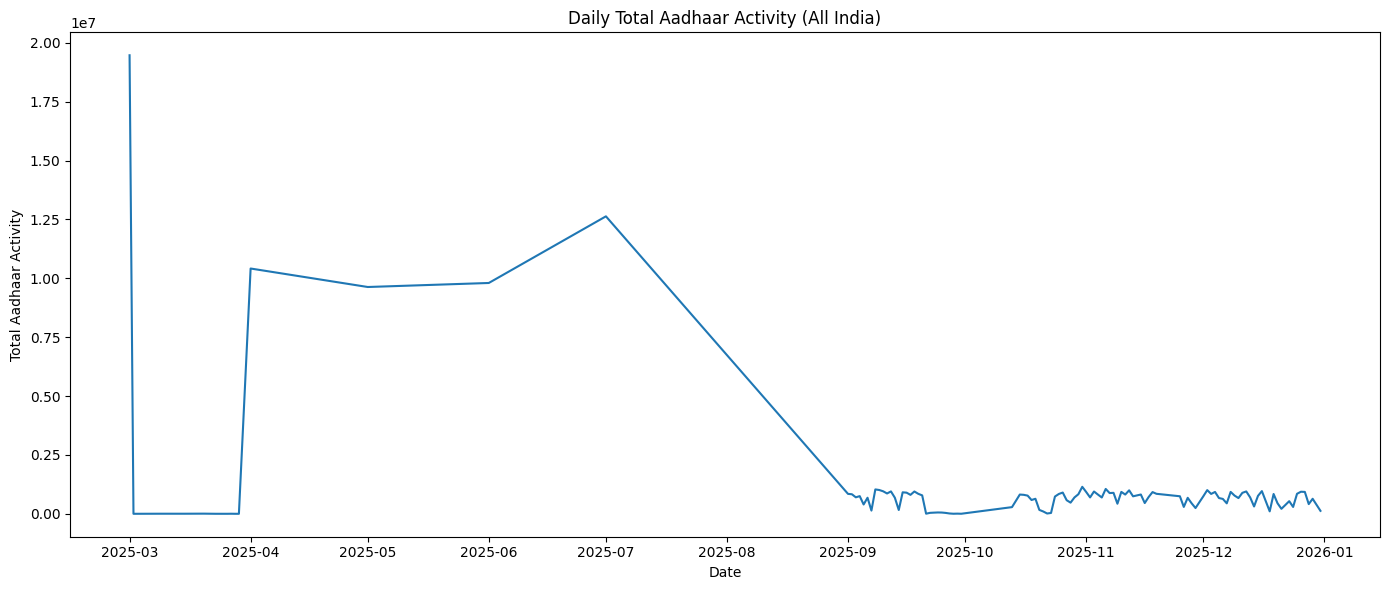

In [ ]:
daily_activity = (
    merged
    .groupby("date")["total_activity"]
    .sum()
    .sort_index()
)

plt.figure(figsize=(14, 6))
plt.plot(daily_activity.index, daily_activity.values)

plt.xlabel("Date")
plt.ylabel("Total Aadhaar Activity")
plt.title("Daily Total Aadhaar Activity (All India)")

plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(merged["date"].unique()).head(120)

,0
0,2025-03-01
1,2025-03-02
2,2025-03-09
3,2025-03-15
4,2025-03-20
...,...
110,2025-12-26
111,2025-12-27
112,2025-12-28
113,2025-12-29


In [ ]:
merged.columns

Index(['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_',
       'bio_age_5_17', 'bio_age_17_', 'age_0_5', 'age_5_17', 'age_18_greater',
       'total_demo_updates', 'total_bio_updates', 'total_enrolments',
       'total_activity', 'total_activity_lakh', 'activity_type', 'month',
       'day_of_week', 'adult_enrolment_skew'],
      dtype='object')

In [ ]:
district_daily = (
    merged
    .groupby(["district", "date"])["total_activity"]
    .sum()
    .reset_index()
)
district_stats = (
    district_daily
    .groupby("district")["total_activity"]
    .agg(["mean", "std"])
    .reset_index()
)
district_stats = district_stats.rename(columns={
    "mean": "mean_activity",
    "std": "std_activity"
})

import plotly.express as px

fig = px.scatter(
    district_stats,
    x="mean_activity",
    y="std_activity",
    hover_name="district",
    labels={
        "mean_activity": "Mean Daily Activity",
        "std_activity": "Activity Volatility (Std Dev)"
    },
    title="District Behaviour: Activity Level vs Volatility"
)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()

In [ ]:
district_totals = (
    merged
    .groupby("district")[[
        "total_enrolments",
        "total_demo_updates",
        "total_bio_updates"
    ]]
    .sum()
    .reset_index()
)

district_totals["total_updates"] = (
    district_totals["total_demo_updates"] +
    district_totals["total_bio_updates"]
)

fig = px.scatter(
    district_totals,
    x="total_enrolments",
    y="total_updates",
    hover_name="district",
    labels={
        "total_enrolments": "Total Enrolments",
        "total_updates": "Total Updates"
    },
    title="District Behaviour: Enrolments vs Updates"
)

fig.show()

In [ ]:
state_activity = state_activity.reset_index()
state_activity["updates"] = (
    state_activity["total_demo_updates"] +
    state_activity["total_bio_updates"]
)
sunburst_df = pd.concat([
    state_activity[["state", "total_bio_updates"]]
        .rename(columns={"total_bio_updates": "value"})
        .assign(activity="Biometric Updates"),

    state_activity[["state", "total_demo_updates"]]
        .rename(columns={"total_demo_updates": "value"})
        .assign(activity="Demographic Updates")
])

sunburst_df = sunburst_df[sunburst_df["value"] > 0]

fig = px.sunburst(
    sunburst_df,
    path=["state", "activity"],
    values="value",
    title="Aadhaar Activity Composition: State → Enrolments vs Updates"
)

fig.update_traces(
    textinfo="label+percent parent",
    insidetextorientation="radial"
)

fig.update_layout(height=650)
fig.show()

In [ ]:
state_activity

,state,total_enrolments,total_demo_updates,total_bio_updates,updates
0,uttar pradesh,1018629,8542328,9577735,18120063
1,bihar,609585,4814350,4897587,9711937
2,madhya pradesh,493970,2912938,5923771,8836709
3,west bengal,375340,3872737,2524619,6397356
4,maharashtra,369139,5054602,9226139,14280741
5,rajasthan,348458,2817615,3994955,6812570
6,gujarat,280549,1824327,3196514,5020841
7,assam,230197,1012578,982722,1995300
8,karnataka,223235,1695285,2635954,4331239
9,tamil nadu,220789,2212228,4698118,6910346


In [ ]:
top_10_states = state_activity.head(10)["state"]
bottom_10_states = state_activity.tail(10)["state"]

In [ ]:
sunburst_base = pd.concat([
    state_activity[["state", "total_bio_updates"]]
        .rename(columns={"total_bio_updates": "value"})
        .assign(activity="Biometric Updates"),

    state_activity[["state", "total_demo_updates"]]
        .rename(columns={"total_demo_updates": "value"})
        .assign(activity="Demographic Updates")
])

sunburst_base = sunburst_base[sunburst_base["value"] > 0]

In [ ]:
sunburst_top10 = sunburst_base[
    sunburst_base["state"].isin(top_10_states)
]

sunburst_bottom10 = sunburst_base[
    sunburst_base["state"].isin(bottom_10_states)
]

In [ ]:
import plotly.express as px

fig_top = px.sunburst(
    sunburst_top10,
    path=["state", "activity"],
    values="value",
    color="state",
    title="Top 10 States: Aadhaar Update Composition"
)

fig_top.update_traces(
    textinfo="label+percent parent",
    insidetextorientation="radial",
    marker=dict(line=dict(color="white", width=1))
)

fig_top.update_layout(
    height=650
)

fig_top.show()

In [ ]:
fig_bottom = px.sunburst(
    sunburst_bottom10,
    path=["state", "activity"],
    values="value",
    color="state",
    title="Bottom 10 States: Aadhaar Update Composition"
)

fig_bottom.update_traces(
    textinfo="label+percent parent",
    insidetextorientation="radial",
    marker=dict(line=dict(color="white", width=1))
)

fig_bottom.update_layout(
    height=650
)

fig_bottom.show()